In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 加載並準備MNIST 數據集
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# 將圖像數據 reshape 為一為向量
train_images = train_images.reshape((60000, 28 * 28))
#train_images = train_images.reshape((60000, 28, 28, 1))     ## 多思，是CNN 才是這樣填的嗎
test_images = test_images.reshape((10000, 28 * 28))
#test_images  = test_images.reshpae((10000, 28, 28, 1))     ## 多思，是CNN 才是這樣填的嗎

In [4]:
#建構DNN 模型
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))    #### 多思，所以這個把這個轉換到一維???
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 訓練模型
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2999 - accuracy: 0.9126 - val_loss: 0.1447 - val_accuracy: 0.9561
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1458 - accuracy: 0.9573 - val_loss: 0.1045 - val_accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.9673 - val_loss: 0.0878 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898 - accuracy: 0.9721 - val_loss: 0.0787 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0743 - accuracy: 0.9771 - val_loss: 0.0751 - val_accuracy: 0.9775


In [7]:
# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("測試模型準確度:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9775
測試模型準確度: 0.9775000214576721


In [8]:
print(test_images[1].shape)

(784,)


In [9]:
!dir
#他的資料夾位置會是在 content 底下這樣。   #這個裡需要去上傳檔案。

7.png  drive  sample_data


In [10]:
#from matplotlib import Image
from PIL import Image
import numpy as np
image = Image.open("7.png").convert('L') ## 將圖像轉換成灰階

image = image.resize((28*28,1))      ### 調整大小為 28 *28 像素
#image = image.resize((28 * 28,1))      ### 調整大小為 28 *28 像素
image = np.array(image) /255.0 #標準化像素質

#image = image.reshape(1,28,28) #添加批次維度

<function matplotlib.pyplot.show(close=None, block=None)>

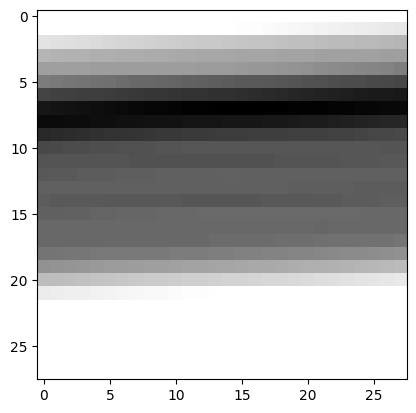

In [11]:
'''
import matplotlib.pyplot as plt
import matplotlib.image as img
image12 = img.imread('7.png')                       # 讀取圖片
plt.imshow(image12)                                    # 在圖表中繪製圖片
plt.show()
'''
#顯示圖片
plt.imshow(image.reshape(28,28), cmap='gray')                  ### 多思，這個也是轉不回來的對八!
plt.show

In [12]:
# 進行預測
predictions = model.predict(image)
predicted_label = np.argmax(predictions)

print("预测结果:", predicted_label)

1/1 [==============================] - 0s 82ms/step
预测结果: 5
